  # A304_SRO_NGO_121K

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

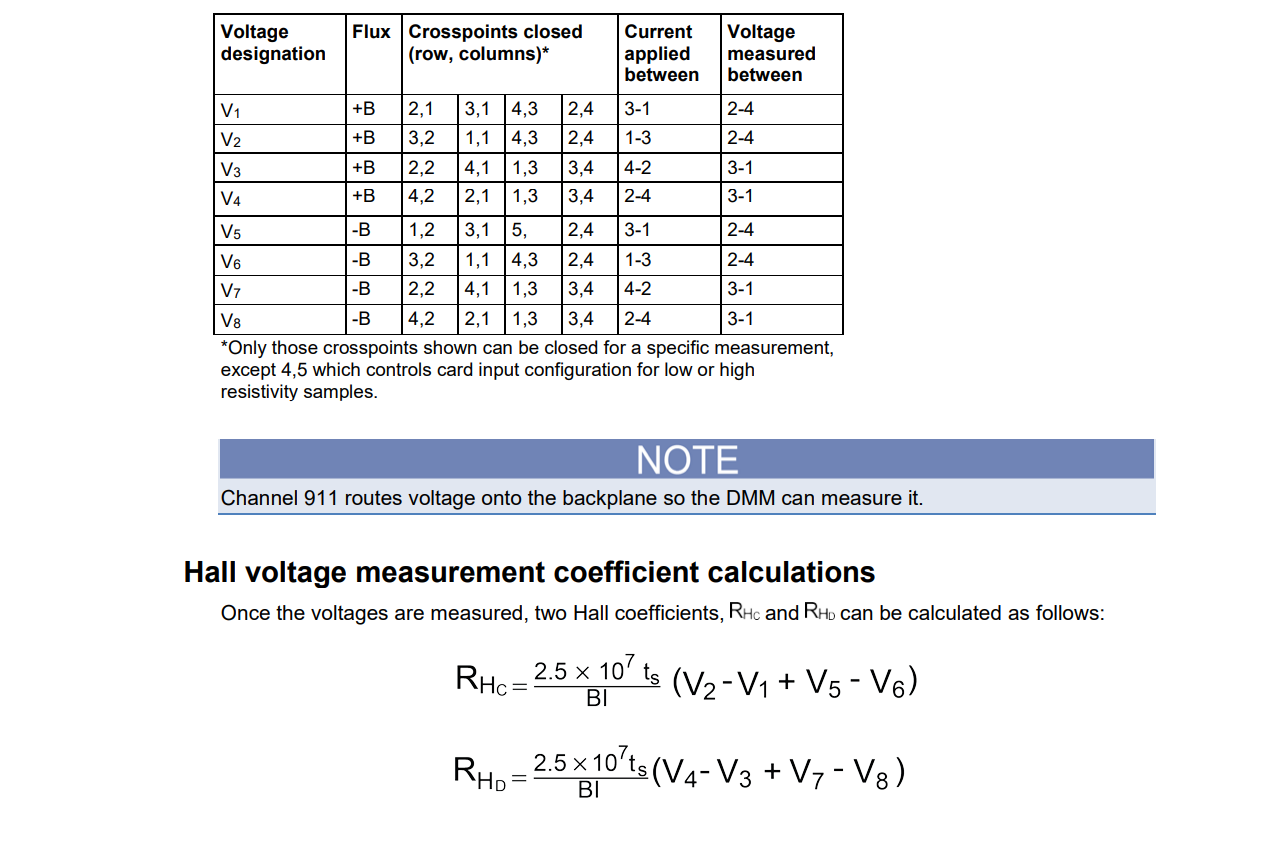

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
t=121
truncate = True # True it contains data from O to Bmax
path =r"..\..\..\Data\A304\A304_Hall_center_contact"
filename = 'A304_SRO_NGO_121K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.481055,120.960065,18.189672,-18.224886,-15.539076,15.539331,5.639000e-07,1000000.0
1,0.001,9000.498779,121.004031,18.709215,-18.699635,-15.080105,15.108958,5.471000e-07,1000000.0
2,0.001,8000.372461,121.001782,19.068615,-19.041767,-14.682899,14.746303,5.380000e-07,1000000.0
3,0.001,7000.491357,120.999629,19.423467,-19.401577,-14.329225,14.386700,5.595000e-07,1000000.0
4,0.001,6000.458252,120.998953,19.748543,-19.720187,-13.983967,14.007063,5.734000e-07,1000000.0
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.239453,121.000272,19.806483,-19.782471,-13.939628,13.959688,5.715000e-07,1000000.0
62,0.001,7000.465161,121.000068,19.441107,-19.416177,-14.320669,14.379752,5.612000e-07,1000000.0
63,0.001,8000.325879,121.000457,19.079874,-19.083028,-14.707879,14.743311,5.700000e-07,1000000.0
64,0.001,9000.476514,121.000234,18.724999,-18.718981,-15.114921,15.133952,5.652000e-07,1000000.0


### Converting B to integer B

In [3]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [4]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.481055,10000,120.960065,18.189672,-18.224886,-15.539076,15.539331,5.639000e-07,1000000.0
1,0.001,9000.498779,9000,121.004031,18.709215,-18.699635,-15.080105,15.108958,5.471000e-07,1000000.0
2,0.001,8000.372461,8000,121.001782,19.068615,-19.041767,-14.682899,14.746303,5.380000e-07,1000000.0
3,0.001,7000.491357,7000,120.999629,19.423467,-19.401577,-14.329225,14.386700,5.595000e-07,1000000.0
4,0.001,6000.458252,6000,120.998953,19.748543,-19.720187,-13.983967,14.007063,5.734000e-07,1000000.0


In [5]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

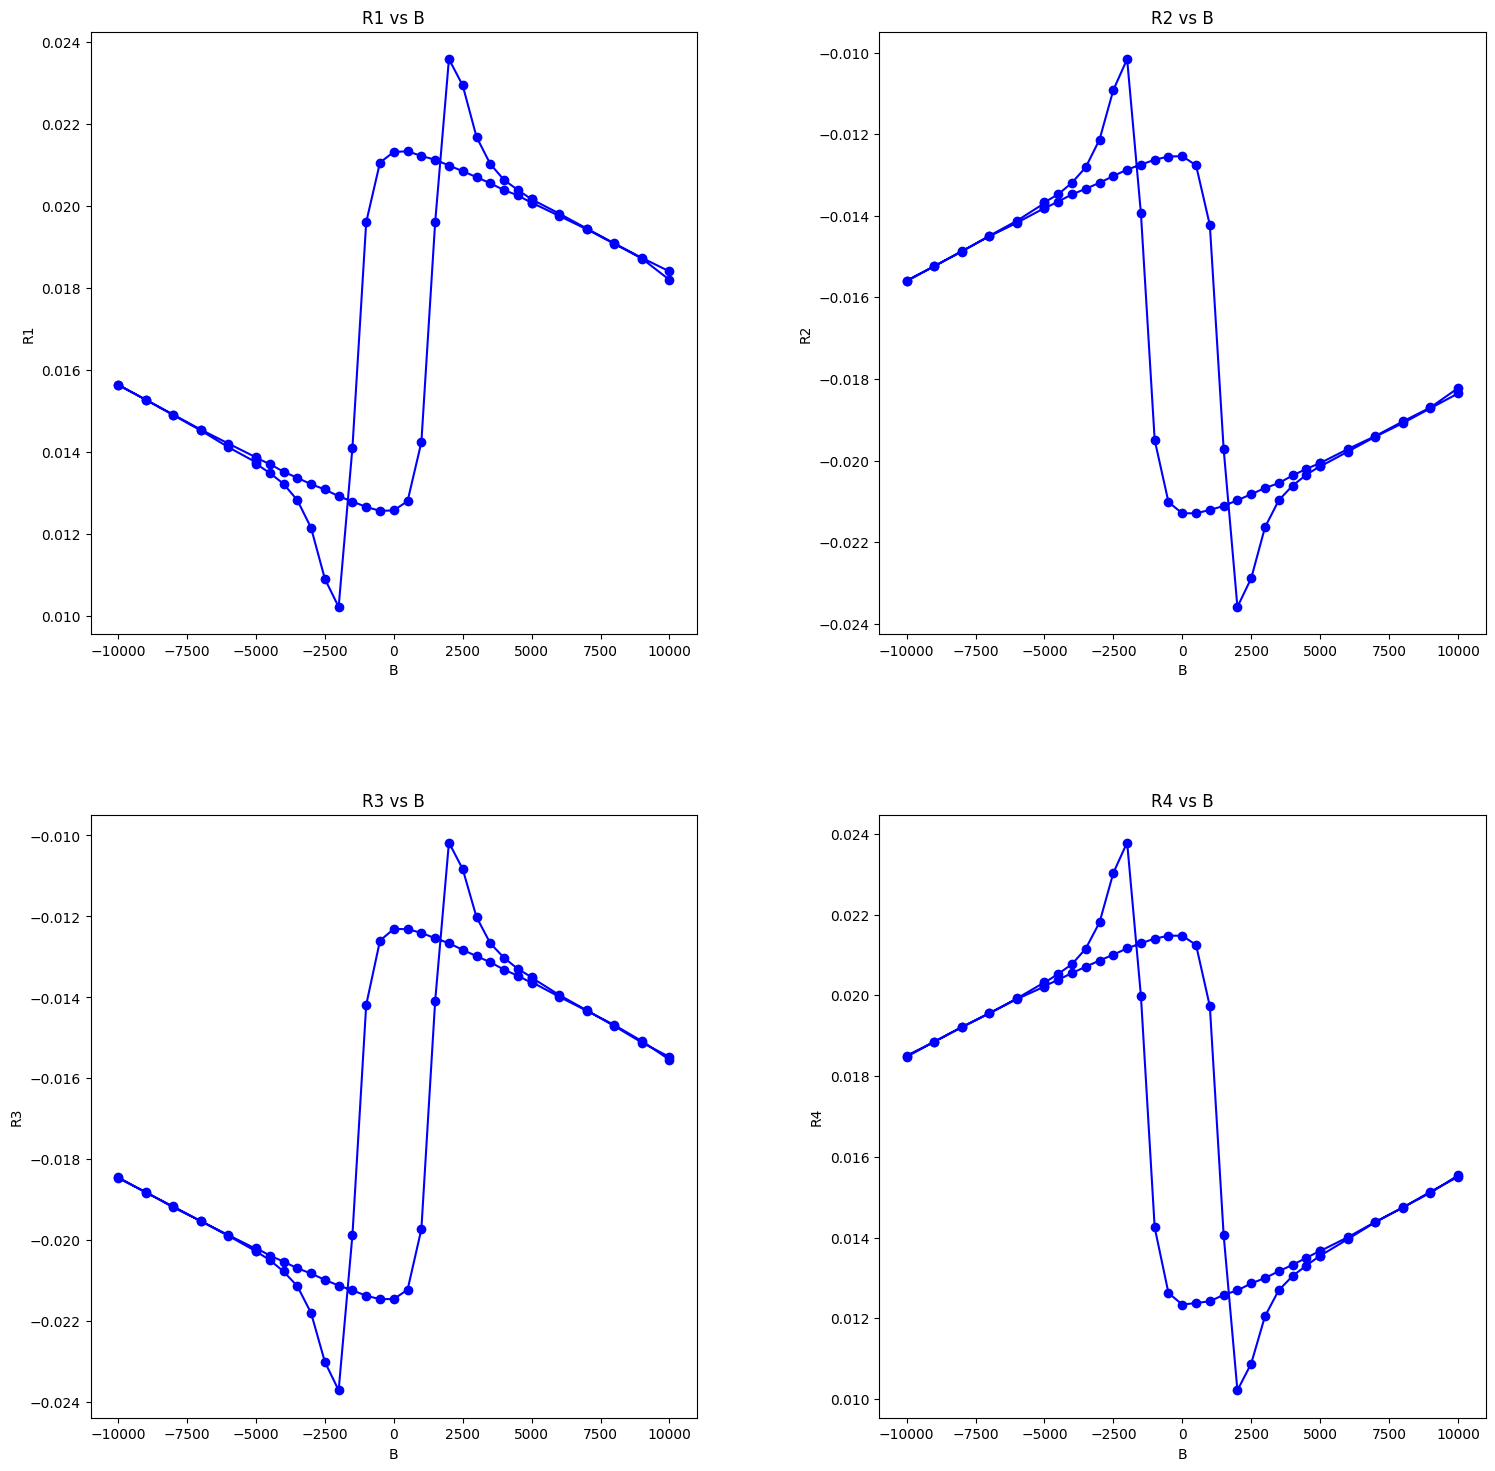

In [6]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [7]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

0


In [8]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

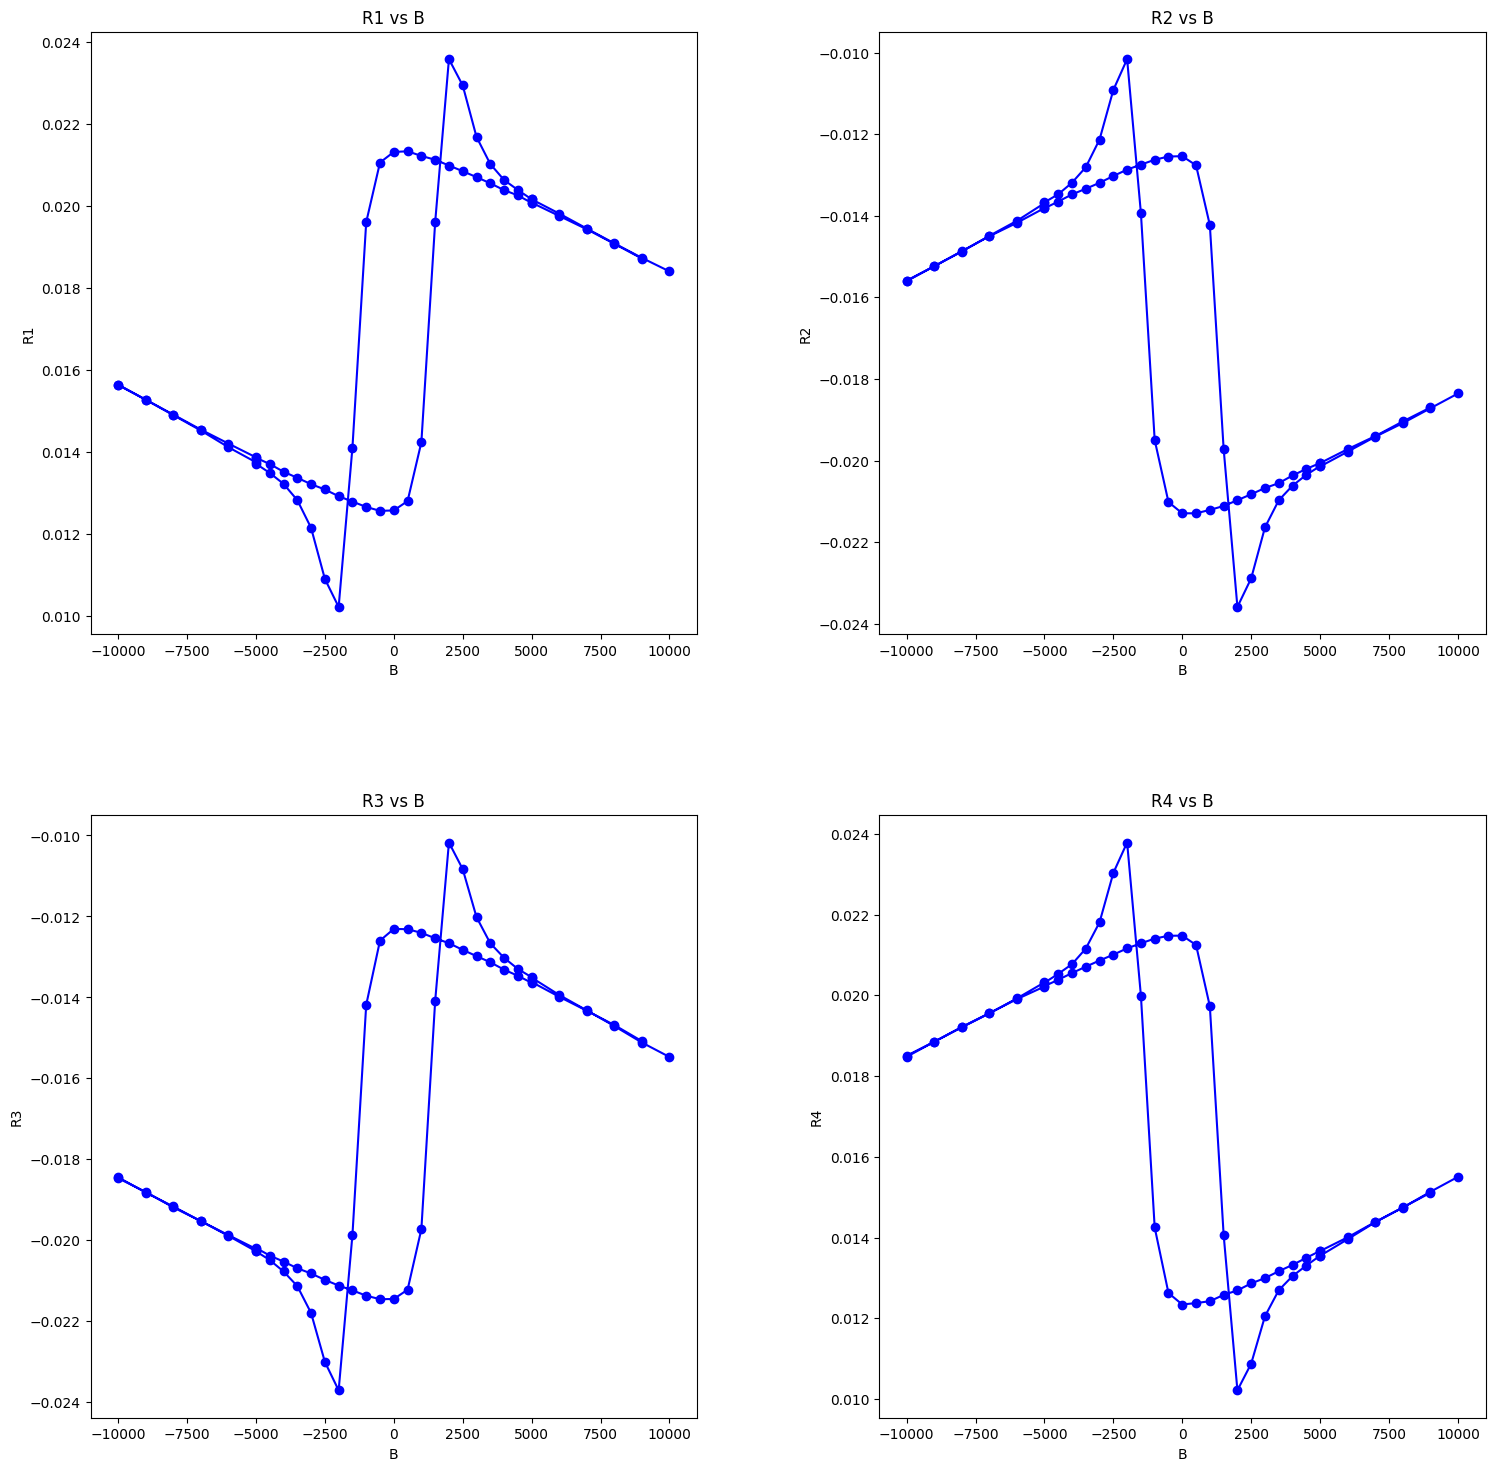

In [9]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [10]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [11]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

31

In [12]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [13]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,9000.498779,9000,121.004031,18.709215,-18.699635,-15.080105,15.108958,5.471000e-07,1000000.0
1,0.001,8000.372461,8000,121.001782,19.068615,-19.041767,-14.682899,14.746303,5.380000e-07,1000000.0
2,0.001,7000.491357,7000,120.999629,19.423467,-19.401577,-14.329225,14.386700,5.595000e-07,1000000.0
3,0.001,6000.458252,6000,120.998953,19.748543,-19.720187,-13.983967,14.007063,5.734000e-07,1000000.0
4,0.001,5000.373145,5000,120.999163,20.073085,-20.062918,-13.619402,13.666041,5.838000e-07,1000000.0


In [14]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
32,0.001,-10000.472021,-10000,121.000378,15.625032,-15.590328,-18.466281,18.502314,5.701000e-07,1000000.0
33,0.001,-9000.514014,-9000,121.000368,15.269572,-15.237397,-18.803763,18.849089,5.985000e-07,1000000.0
34,0.001,-8000.328467,-8000,121.000653,14.904807,-14.869162,-19.186131,19.214570,5.787000e-07,1000000.0
35,0.001,-7000.454541,-7000,121.000001,14.538918,-14.503803,-19.524998,19.557512,5.704000e-07,1000000.0
36,0.001,-6000.435352,-6000,121.000477,14.197889,-14.173389,-19.870783,19.904285,5.734000e-07,1000000.0


In [15]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [16]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,9000,121.004031,18.709215,-18.699635,-15.080105,15.108958,15.269572,-15.237397,-18.803763,18.849089,1000000.0
1,0.001,8000,121.001782,19.068615,-19.041767,-14.682899,14.746303,14.904807,-14.869162,-19.186131,19.214570,1000000.0
2,0.001,7000,120.999629,19.423467,-19.401577,-14.329225,14.386700,14.538918,-14.503803,-19.524998,19.557512,1000000.0
3,0.001,6000,120.998953,19.748543,-19.720187,-13.983967,14.007063,14.197889,-14.173389,-19.870783,19.904285,1000000.0
4,0.001,5000,120.999163,20.073085,-20.062918,-13.619402,13.666041,13.862541,-13.810956,-20.211537,20.217112,1000000.0


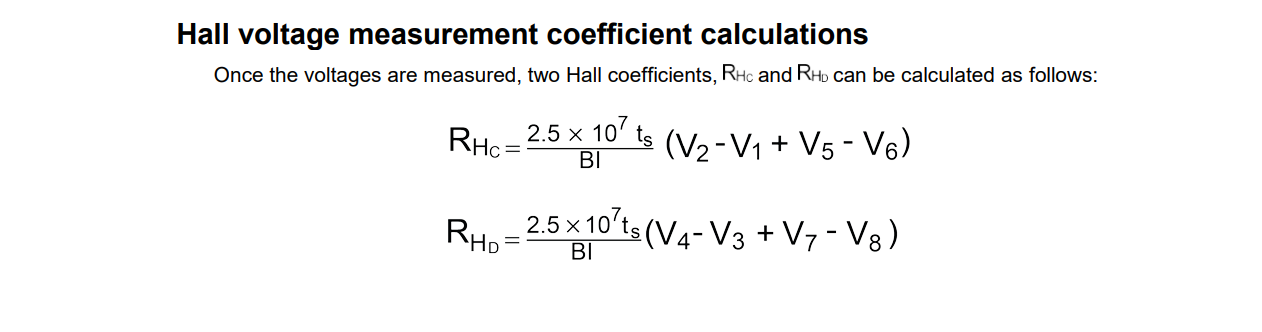
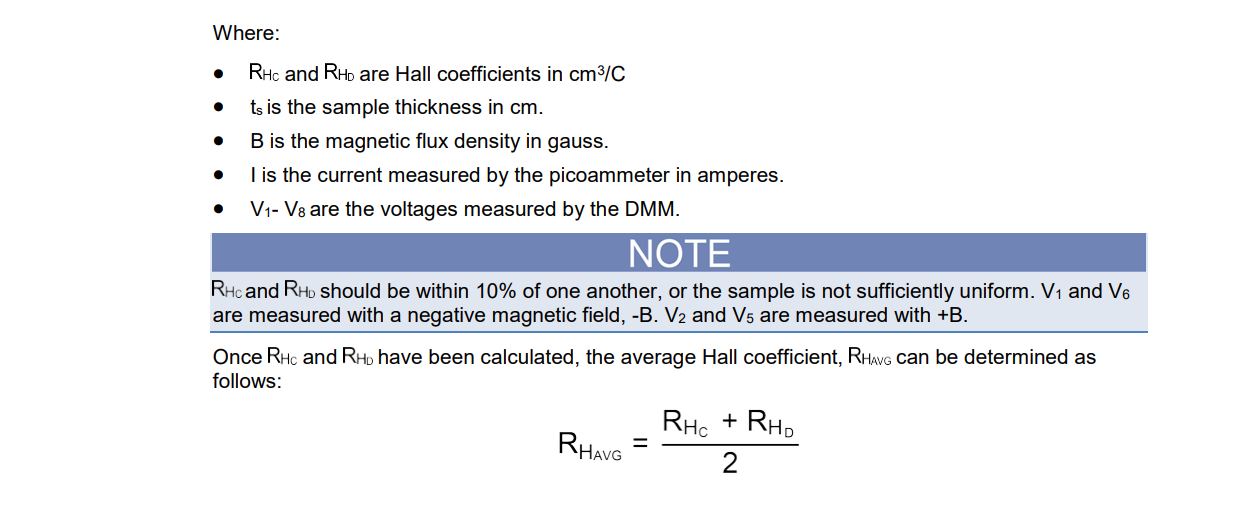

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [17]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

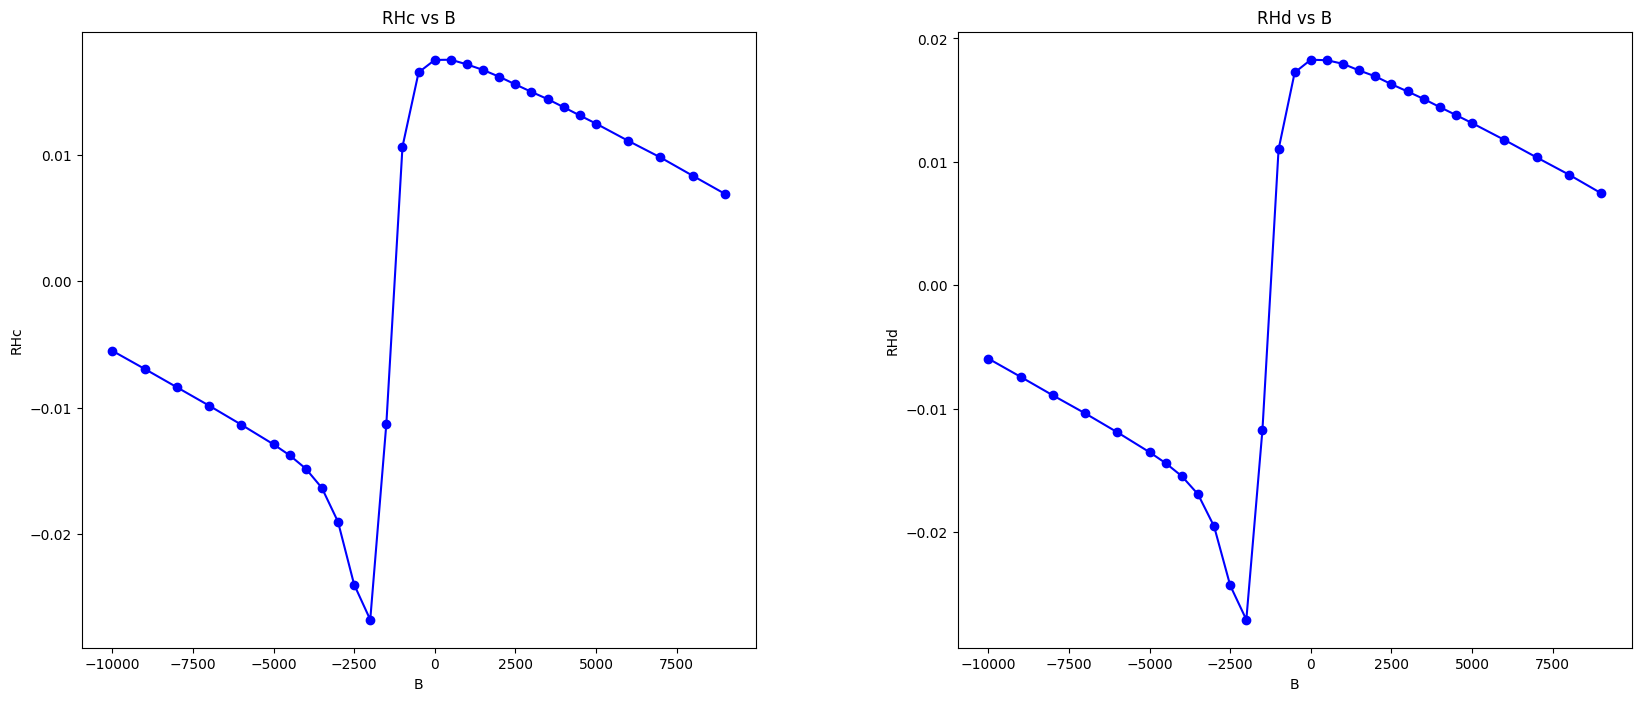

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

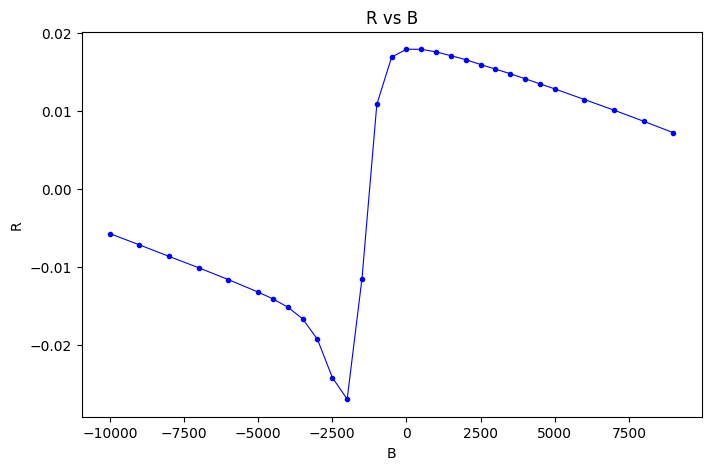

In [19]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [20]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-9000,121.000368,15.269572,-15.237397,-18.803763,18.849089,18.709215,-18.699635,-15.080105,15.108958,1000000.0
1,0.001,-8000,121.000653,14.904807,-14.869162,-19.186131,19.214570,19.068615,-19.041767,-14.682899,14.746303,1000000.0
2,0.001,-7000,121.000001,14.538918,-14.503803,-19.524998,19.557512,19.423467,-19.401577,-14.329225,14.386700,1000000.0
3,0.001,-6000,121.000477,14.197889,-14.173389,-19.870783,19.904285,19.748543,-19.720187,-13.983967,14.007063,1000000.0
4,0.001,-5000,121.000375,13.862541,-13.810956,-20.211537,20.217112,20.073085,-20.062918,-13.619402,13.666041,1000000.0


### Hall resistance calculation

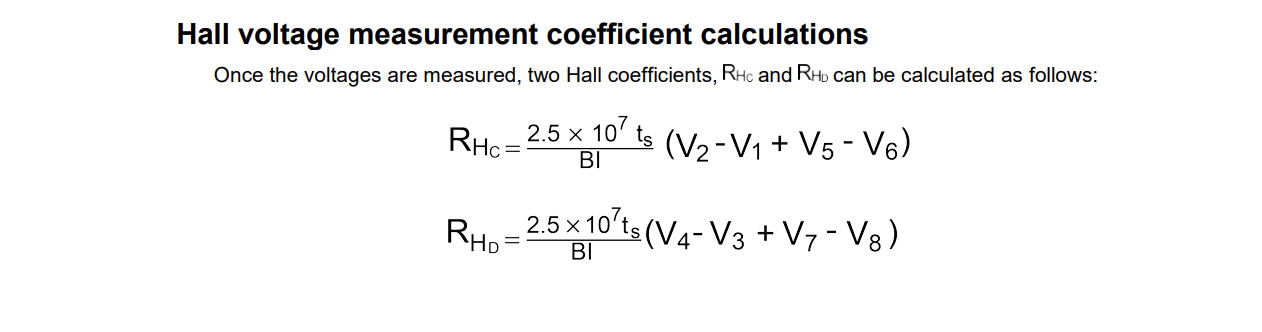

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [21]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

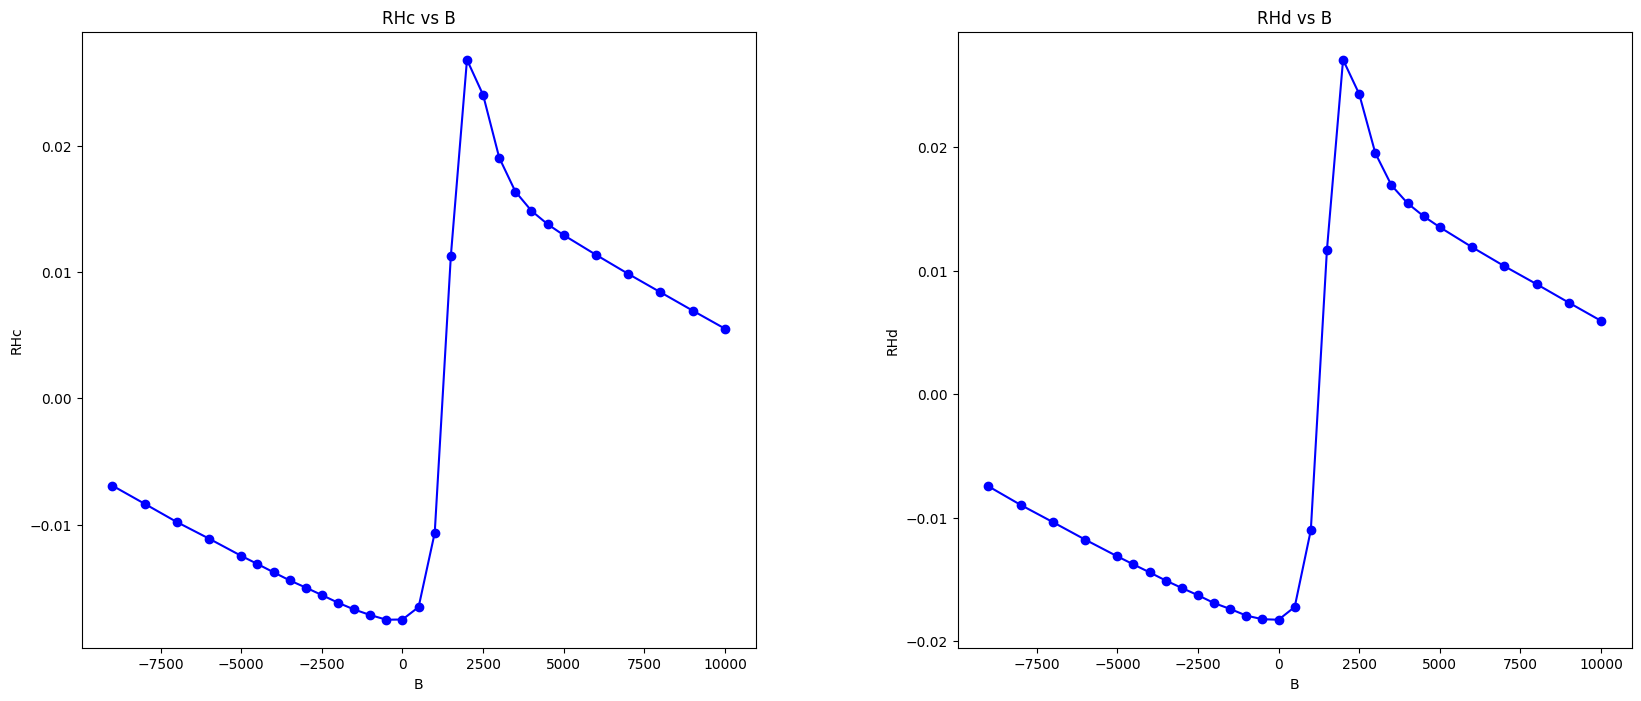

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

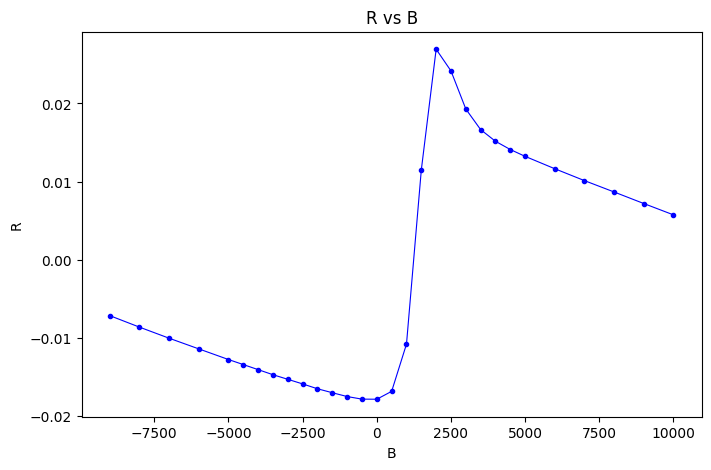

In [23]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

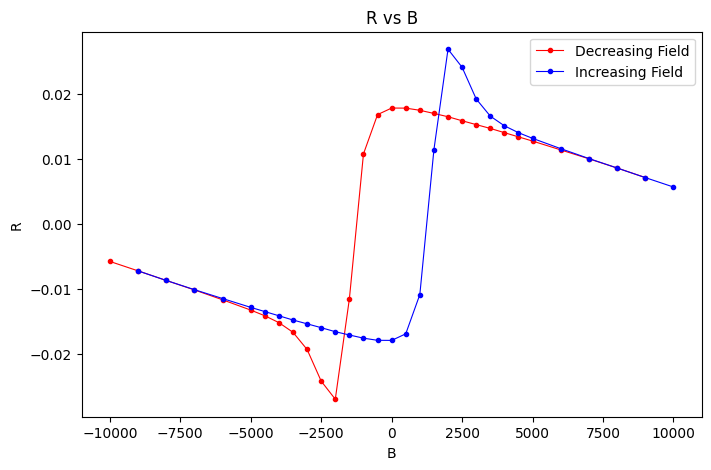

In [24]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [25]:
data = pd.concat([data_dec,data_inc])
folder = "Processed_data"
loc = os.path.join(folder, filename)
try: 
    os.mkdir(folder) 
except: pass
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{loc}')

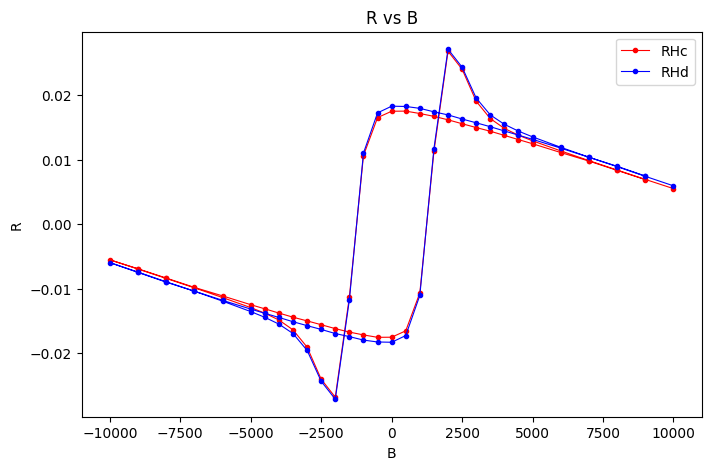

In [26]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['RHc'], 'ro-', linewidth=0.8, markersize=3, label = 'RHc')
plt.plot(data['B'],data['RHd'],'bo-', linewidth=0.8, markersize=3, label = 'RHd')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')

plt.legend()
plt.show()

In [27]:
data.to_pickle(f"./pickle_data/HALL_CENTRALCONTACT_{t}K.pkl")

# 